Modularity of the subgraph with first 1000 nodes: 0.9153724005468222


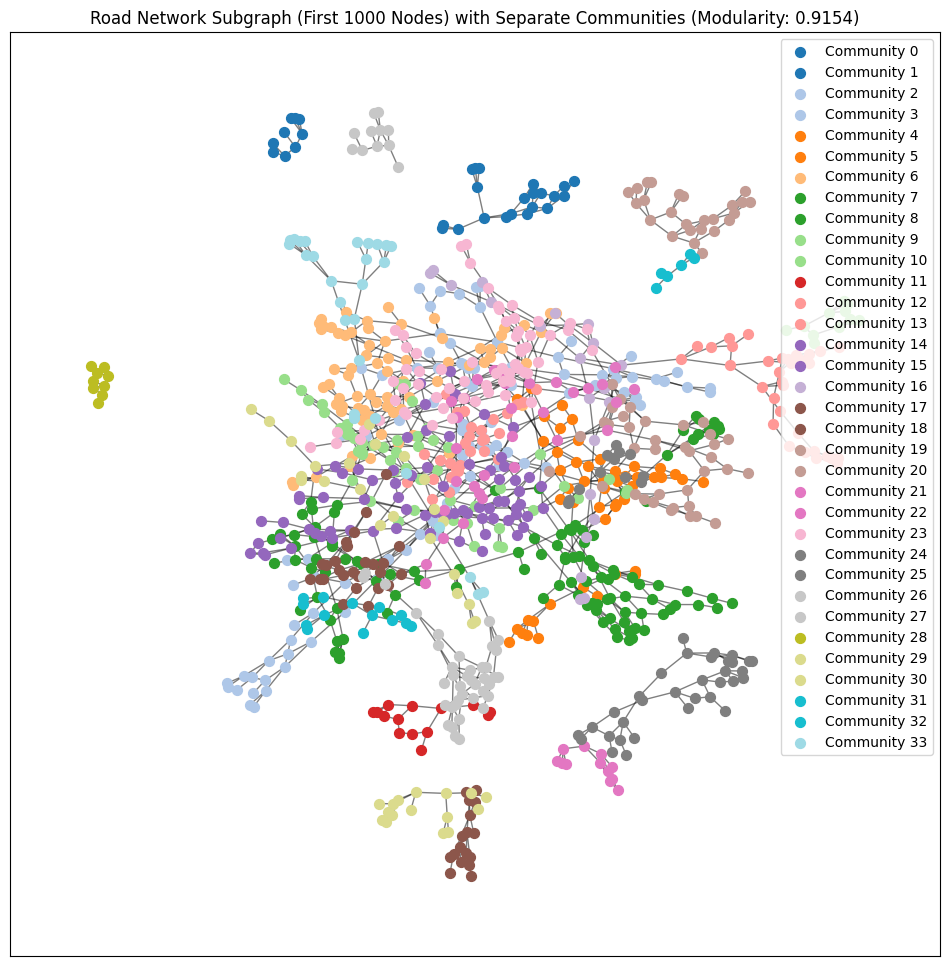

In [2]:
import pandas as pd
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('/kaggle/input/networks/roadNet-PA_2.csv', header=None, delimiter='\t')
data[['FromNodeId', 'ToNodeId']] = data[0].str.split('\t', expand=True)
data = data.drop(columns=[0])
data = data.dropna(subset=['FromNodeId', 'ToNodeId'])
data['FromNodeId'] = pd.to_numeric(data['FromNodeId'], errors='coerce')
data['ToNodeId'] = pd.to_numeric(data['ToNodeId'], errors='coerce')
data = data.dropna(subset=['FromNodeId', 'ToNodeId'])

# Step 2: Create the graph
G = nx.Graph()

# Add edges to the graph
for index, row in data.iterrows():
    from_node = int(row['FromNodeId'])
    to_node = int(row['ToNodeId'])
    G.add_edge(from_node, to_node)

# Step 3: Create a subgraph with only the first 1000 nodes
nodes_to_include = list(G.nodes)[:1000]  # Get the first 1000 nodes
subgraph = G.subgraph(nodes_to_include)  # Create a subgraph with those nodes

# Step 4: Perform community detection using Louvain method on the subgraph
partition = community_louvain.best_partition(subgraph)

# Step 5: Calculate the modularity of the subgraph
modularity = community_louvain.modularity(partition, subgraph)
print("Modularity of the subgraph with first 1000 nodes:", modularity)

# Step 6: Separate clusters and visualize with unique colors
# Prepare the position for nodes
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subgraph, seed=42)  # Fixed seed for consistent layout

# Assign a unique color to each community
cmap = plt.get_cmap('tab20')  # Choose a color palette with distinct colors
unique_communities = sorted(set(partition.values()))  # Sort community labels for consistent coloring
color_map = {community_id: cmap(i / len(unique_communities)) for i, community_id in enumerate(unique_communities)}

# Draw nodes and edges
for community_id in unique_communities:
    # Find nodes that belong to this community
    nodes_in_community = [node for node, comm in partition.items() if comm == community_id]
    
    # Draw the nodes of this community with a unique color
    nx.draw_networkx_nodes(
        subgraph, pos, nodelist=nodes_in_community, node_size=50, node_color=[color_map[community_id]],
        label=f"Community {community_id}"
    )

# Draw edges
nx.draw_networkx_edges(subgraph, pos, alpha=0.5)

# Title and legend
plt.title(f'Road Network Subgraph (First 1000 Nodes) with Separate Communities (Modularity: {modularity:.4f})')
plt.legend(loc='upper right')
plt.show()

# Step 7: Save the subgraph (optional)
nx.write_graphml(subgraph, "road_network_subgraph_1000_nodes_with_separated_communities.graphml")
